# Analisis Exploratorio de los datos


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [87]:
#-- Cargar los datos---#
df=pd.read_csv('datos_miniproyecto1.csv',sep=';')
df = df.rename(columns={'Target': 'Estado'})
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Estado
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [88]:
print(df.columns.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance\t' 'Previous qualification'
 'Previous qualification (grade)' 'Nacionality' "Mother's qualification"
 "Father's qualification" "Mother's occupation" "Father's occupation"
 'Admission grade' 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Estado']


In [89]:
print(df.shape)

(4424, 37)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [91]:
Cat_vars = df[['Marital status', 'Application mode',                                 
   'Application order', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
    'Mother\'s occupation', 'Father\'s occupation','Displaced',                                       
   'Educational special needs',                       
  'Debtor' ,                                        
  'Tuition fees up to date'  ,                        
  'Gender'  ,                                          
  'Scholarship holder','International','Estado']] 
Cat_vars= Cat_vars.astype('object')                              

Num_vars = df[['Previous qualification (grade)','Admission grade','Age at enrollment','Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
            'Unemployment rate', 'Inflation rate', 'GDP']]


In [92]:
Num_vars.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [93]:
Cat_vars.describe(include='object')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Estado
count,4424,4424,4424,4424,4424,4424,4424.0,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,101.0,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,9500,1,1,133.1,1,1,37,9,9,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,491.0,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


# Variables respuesta

Para el proyecto nuestras variables respuesta o "Target" serán __Estado__ y __GDP__

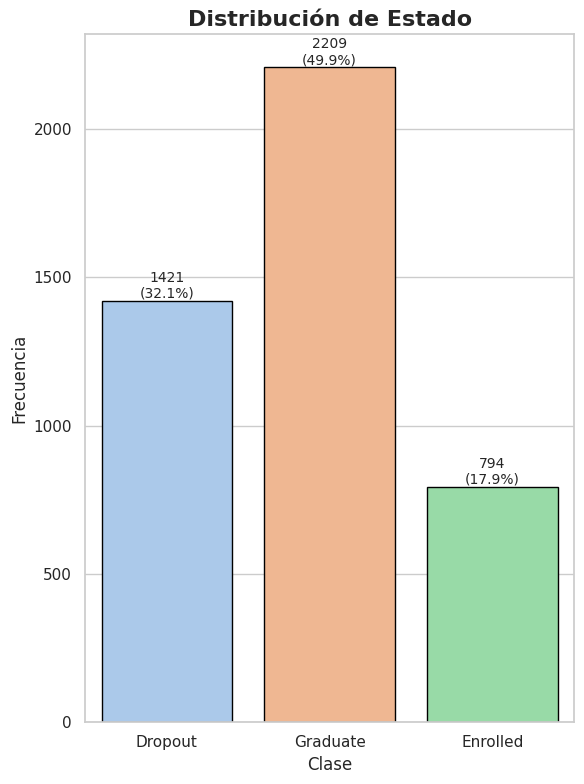

In [94]:
sns.set(style="whitegrid", palette="pastel", font_scale=1)

plt.figure(figsize=(6, 8))
ax = sns.countplot(data=df, x='Estado', hue='Estado', legend=False,
                   palette='pastel', edgecolor='black')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}\n({height/len(df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribución de Estado', fontsize=16, weight='bold')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

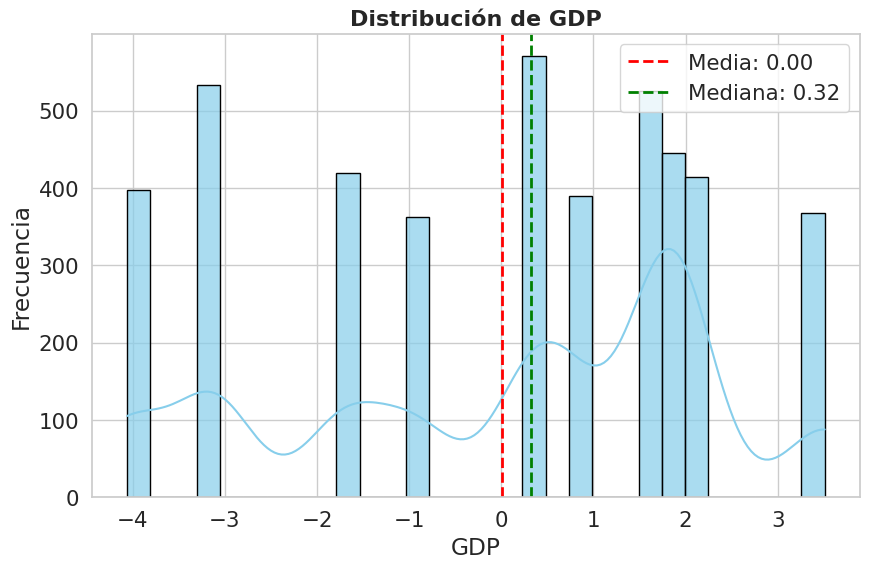

In [95]:
sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize=(9, 6))

# histograma + densidad
ax = sns.histplot(data=df, x='GDP', bins=30, kde=True,
                  color='skyblue', edgecolor='black', alpha=0.7)
# título y ejes
plt.title(f'Distribución de GDP', fontsize=16, weight='bold')
plt.xlabel('GDP')
plt.ylabel('Frecuencia')
# estadísticas clave en el gráfico
mean_val = df['GDP'].mean()
median_val = df['GDP'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

# Preprocesamiento


# Division de datos

In [97]:
X= df.drop(columns=['Estado','GDP'])
Y_Estado=df['Estado']
Y_GDP=df['GDP']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_Estado, X_test_Estado, Y_train_Estado, Y_test_Estado = train_test_split(X, Y_Estado, test_size=0.3, random_state=42, stratify=Y_Estado)
X_train_GDP, X_test_GDP, Y_train_GDP, Y_test_GDP = train_test_split(X, Y_GDP, test_size=0.3, random_state=42)
print("Clasificación - Estado:")
print("Train:", X_train_Estado.shape, "Test:", X_test_Estado.shape)

print("\nRegresión - GDP:")
print("Train:", X_train_GDP.shape, "Test:", X_test_GDP.shape)

Clasificación - Estado:
Train: (3096, 35) Test: (1328, 35)

Regresión - GDP:
Train: (3096, 35) Test: (1328, 35)


# KNN Classifier

# KNN Regresion

# Comparación de distintos valores de k

# Documentación y conclusiones